In [1311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler
import geopandas

In [1326]:
data = pd.read_csv('data/ACSST5Y2018.S0101_data_with_overlays_2020-09-09T171138.csv', low_memory=False, header=1)

In [1327]:
# Delete margin of error columns
data = data[data.columns.drop(list(data.filter(regex='^Margin')))]

In [1328]:
# Replace (X) with NaN values
data = data.replace({'(X)': np.nan})

In [1329]:
# Drop estimate percent total population because it doesn't make sense
data.drop(['Estimate!!Percent!!Total population'], axis=1, inplace=True)

In [1330]:
# Fill in percentage male total population
data['Estimate!!Percent Male!!Total population'] = data['Estimate!!Male!!Total population']/data['Estimate!!Total!!Total population']

In [1331]:
# Fill in percentage female total population
data['Estimate!!Percent Female!!Total population'] = data['Estimate!!Female!!Total population']/data['Estimate!!Total!!Total population']



In [1332]:
# Null data points
data.isnull().values.sum()

1093602

In [1333]:
# Total data points
data.shape[0] * data.shape[1]

7584480

In [1334]:
# Delete percent allocated columns
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Sex'], axis=1, inplace=True)
data.drop(['Estimate!!Total!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Male!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)
data.drop(['Estimate!!Percent Female!!PERCENT ALLOCATED!!Age'], axis=1, inplace=True)

In [1335]:
data.drop('Estimate!!Total!!PERCENT ALLOCATED!!Sex', axis=1, inplace=True)

In [1336]:
data['zip'] = data['Geographic Area Name'].str[-5:]


In [1337]:
data['zip'].nunique()

33120

### Density - if I have time to add

In [1016]:
uszips = pd.read_csv('data/uszips.csv')

In [1017]:
density = uszips[['zip', 'density']]

In [1018]:
density['zip'] = density['zip'].astype(str)

In [1479]:
density.set_index('zip', inplace=True)

In [1480]:
density.head()

,density
zip,
601,111.4
602,523.5
603,667.9
606,60.4
610,312.0


#### Real estate

In [1165]:
real_estate = pd.read_excel('data/HPI_AT_BDL_ZIP5.xlsx')

In [1166]:
# Drop first 5 rows
real_estate = real_estate.iloc[5:]

In [1167]:
# Make first row the header
real_estate.rename(columns=real_estate.iloc[0], inplace = True)

In [1168]:
# Delete repeating row
real_estate = real_estate.iloc[1:]

In [1169]:
# Select rows that are Year 2019t
real_estate_2019 = real_estate[real_estate['Year']=='2019']

### Veteran Status


In [1338]:
veteran = pd.read_csv('data/ACSST5Y2018.S2101_data_with_overlays_2020-09-14T113935.csv', low_memory=False, header=1)

In [1339]:
veteran['zip'] = veteran['Geographic Area Name'].str[-5:]

In [1340]:
# Delete margin of error columns
veteran = veteran[veteran.columns.drop(list(veteran.filter(regex='^Margin')))]

### Transportation

In [1341]:
transportation = pd.read_csv('data/ACSST5Y2018.S0801_data_with_overlays_2020-09-05T010054.csv', low_memory=False, header=1)

In [1342]:
transportation['zip'] = transportation['Geographic Area Name'].str[-5:]

In [1343]:
# Delete margin of error columns
transportation = transportation[transportation.columns.drop(list(transportation.filter(regex='MOE')))]

### Housing and Income


In [1344]:
financial_char = pd.read_csv('data/ACSST5Y2018.S2503_data_with_overlays_2020-09-08T115524.csv', low_memory=False, header=1)

In [1345]:
financial_char['zip'] = financial_char['Geographic Area Name'].str[-5:]

In [1346]:
# Delete margin of error columns
financial_char = financial_char[financial_char.columns.drop(list(financial_char.filter(regex='^Margin')))]

### Education

In [1347]:
education = pd.read_csv('data/Education.csv', low_memory=False, header=1)

In [1348]:
education['zip'] = education['Geographic Area Name'].str[-5:]

In [1349]:
# Delete margin of error columns
education = education[education.columns.drop(list(education.filter(regex='^Margin')))]

### Employment


In [1350]:
employment = pd.read_csv('data/ACSST5Y2018.S2302_data_with_overlays_2020-09-08T190000.csv', low_memory=False, header=1)

In [1351]:
# zip column
employment['zip'] = employment['Geographic Area Name'].str[-5:]

In [1352]:
# Delete margin of error columns
employment = employment[employment.columns.drop(list(employment.filter(regex='^Margin')))]

### Marital status


In [1353]:
marital = pd.read_csv('data/ACSST5Y2018.S1201_data_with_overlays_2020-09-14T121102.csv', low_memory=False, header=1)

In [1354]:
# zip column
marital['zip'] = marital['Geographic Area Name'].str[-5:]

In [1355]:
# Delete margin of error columns
marital = marital[marital.columns.drop(list(marital.filter(regex='^Margin')))]

### Language spoken at home

In [1356]:
language = pd.read_csv('data/ACSST5Y2018.S1601_data_with_overlays_2020-09-14T123248.csv', low_memory=False, header=1)

In [1357]:
# zip column
language['zip'] = language['Geographic Area Name'].str[-5:]

In [1358]:
# Delete margin of error columns
language = language[language.columns.drop(list(language.filter(regex='^Margin')))]

In [1359]:
# Drop Estimated Percent Pop 5 Years and over - no data
language.drop('Estimate!!Percent!!Population 5 years and over', axis=1, inplace=True)

### Drop id and Geographic Area Name

In [1360]:

employment.drop('id', axis=1, inplace=True)
employment.drop('Geographic Area Name', axis=1, inplace=True)
education.drop('id', axis=1, inplace=True)
education.drop('Geographic Area Name', axis=1, inplace=True)
financial_char.drop('id', axis=1, inplace=True)
financial_char.drop('Geographic Area Name', axis=1, inplace=True)
language.drop('id', axis=1, inplace=True)
language.drop('Geographic Area Name', axis=1, inplace=True)
data.drop('id', axis=1, inplace=True)
data.drop('Geographic Area Name', axis=1, inplace=True)
veteran.drop('id', axis=1, inplace=True)
veteran.drop('Geographic Area Name', axis=1, inplace=True)
marital.drop('id', axis=1, inplace=True)
marital.drop('Geographic Area Name', axis=1, inplace=True)
transportation.drop('id', axis=1, inplace=True)
transportation.drop('Geographic Area Name', axis=1, inplace=True)

In [1361]:
# Make zip column the index

employment.set_index('zip', inplace=True)
education.set_index('zip', inplace=True)
financial_char.set_index('zip', inplace=True)
language.set_index('zip', inplace=True)
data.set_index('zip', inplace=True)
marital.set_index('zip', inplace=True)
veteran.set_index('zip', inplace=True)
transportation.set_index('zip', inplace=True)

In [1362]:
# Drop empty columns- marital
marital.drop('Estimate!!Now married (except separated)!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Widowed!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Divorced!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Separated!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)
marital.drop('Estimate!!Never married!!PERCENT ALLOCATED!!Marital status', axis=1, inplace=True)

In [1363]:
# Delete marital columns with (X)
marital = marital.loc[:, ~(marital == '(X)').any()]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [1364]:
# Delete veterans columns with (X)
veteran = veteran.loc[:, ~(veteran == '(X)').any()]

In [1365]:
# Delete education columns with (X)
education = education.loc[:, ~(education == '(X)').any()]

In [1366]:
# Delete financial_char columns with (X)
financial_char = financial_char.loc[:, ~(financial_char == '(X)').any()]

In [1367]:
data = data.loc[:, ~(data == '(X)').any()]

In [1368]:
# Delete employment columns with (X)
employment = employment.loc[:, ~(employment == '(X)').any()]

In [1369]:
# Delete language columns with (X)
language = language.loc[:, ~(language == '(X)').any()]

In [1370]:
# Delete transportation columns with (X)
transportation = transportation.loc[:, ~(transportation == '(X)').any()]

Most useful features idea:
1) Household income
2) Percent of children
3) Percent children under 5
4) Percent owner occupied housing
5) Overall population size
6) Percent veterans
7) Percent speak English
8) HPI
9) HPI annual change
10) Percent female population
11) Percent over 65
12) Percent population over 25 with bachelor degree
13) Percent population over 25 with graduate degree
14) Percent population over 25 with high school diploma
15) Male percent population over 25 with bachelor degree
16) Male Percent population over 25 with graduate degree
17) Percent population over 25 with high school diploma
18) Female percent population over 25 with bachelor degree
19) Female Percent population over 25 with graduate degree
20)  Female Percent population over 25 with high school diploma
21) Percent divorced
22) Percent separated
23) Percent never been married
24) Percent families - employment
25) Percent families with own children under 18 - employment
26) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force 
27) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife in labor force
28) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
29) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force
30) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
31) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force
32) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
33) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force
34) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
35) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families
36) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
37) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present
38) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
39) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force
40) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present 
41) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present
42) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
43) Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force
44) Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force
45) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
46) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months
47) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
48) Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months
49) Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months
50) Percent speak spanish
51) Percent speak other language
52) Percent drive/ride in private vehicle
53) Percent walk
54) Percent public transportation
55) Percent work remote
56) Mean commute time
57) Median HH Income
58) Median Renter HH Income
59) Median Owner HH Income

In [1371]:
employment_percents = employment.filter(regex='Percent')

In [1372]:
veteran_percents = veteran.filter(regex='Percent')

In [1373]:
education_percents = education.filter(regex='Percent')

In [1374]:
marital_percents = marital.iloc[:, 1:6]

In [1375]:
# Correct percentage columns for financial_char
financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units'] = financial_char['Estimate!!Owner-occupied housing units!!Occupied housing units'] / financial_char['Estimate!!Occupied housing units!!Occupied housing units']
financial_char['Estimate!!Percent renter-occupied housing units!!Occupied housing units'] = 1 - financial_char['Estimate!!Percent owner-occupied housing units!!Occupied housing units']

In [1376]:
financial_char_percents = financial_char.filter(regex='Percent')

In [1377]:
language_percents = language.filter(regex='Percent')

### Histogram of size of population by zip code

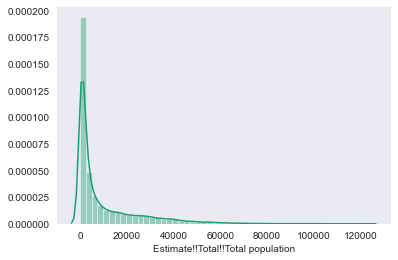

In [1378]:
sns.distplot(data['Estimate!!Total!!Total population'])

In [1379]:
total_pop = data['Estimate!!Total!!Total population']

In [1380]:
data_percents = data.filter(regex='Percent')

In [1381]:
# Concatenate total population back to data percents
data_percents['total_pop'] = total_pop

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1382]:
# replace '-' with NaN
data_percents = data_percents.replace({'-': np.nan})

In [1383]:
# Drop columns with all nans

data_percents.dropna(axis=1, how='all', inplace=True)

In [1384]:
# Change all data_percents columns to floats
for i in data_percents.columns:
    try:
        data_percents[i] = data_percents[i].astype(float)
    except:
        continue


In [1385]:
# Delete columns in data that are not floats
data_percents = data_percents.select_dtypes(exclude=['object'])

#### Edit real estate dataset

In [1386]:
real_estate_2019.rename(columns={'Five-Digit ZIP Code': 'zip'}, inplace=True)

In [1387]:
real_estate_2019 = real_estate_2019[['zip', 'Annual Change (%)', 'HPI']]

KeyError: "['zip', 'Annual Change (%)'] not in index"

In [1219]:
# Set zip as index
real_estate_2019.set_index('zip', inplace=True)

In [1220]:
# Rename Annual Change(%) 
real_estate_2019.rename(columns={'Annual Change (%)': 'HPI_%_Annual_Change'}, inplace=True)

#### Edit education percents dataset

In [1388]:
# replace '-' with NaN
education_percents = education_percents.replace({'-': np.nan})

In [1389]:
# Change all education_percents columns to floats
for i in education_percents.columns:
    try:
        education_percents[i] = education_percents[i].astype(float)
    except:
        continue

In [1390]:
list(education_percents.columns)

['Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 'Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!High school graduate or higher',
 "Estimate!!Percent!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 "Estimate!!Percent Male!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 "Estimate!!Percent Female!!Population 25 years and over!!Population 35 to 44 years!!Bachelor's degree or higher",
 'Estimate!!Percent!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 'Estimate!!Percent Male!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 'Estimate!!Percent Female!!Population 25 years and over!!Population 45 to 64 years!!High school graduate or higher',
 "Estimate!!Percent!!Population 25 years and over!!Population 45 to 64 years!!Bachelo

In [1391]:
education_percents = education_percents[["Estimate!!Percent!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent!!Population 25 years and over!!Some college, no degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Bachelor's degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!Graduate or professional degree", 
                                         "Estimate!!Percent Male!!Population 25 years and over!!High school graduate or higher", 
                                         "Estimate!!Percent Female!!Population 25 years and over!!High school graduate or higher"]]

In [1392]:
education_percents.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33120 entries, 00601 to 99929
Data columns (total 10 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Estimate!!Percent!!Population 25 years and over!!Bachelor's degree                       32763 non-null  float64
 1   Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree         32763 non-null  float64
 2   Estimate!!Percent!!Population 25 years and over!!High school graduate or higher          32763 non-null  float64
 3   Estimate!!Percent!!Population 25 years and over!!Some college, no degree                 32763 non-null  float64
 4   Estimate!!Percent Male!!Population 25 years and over!!Bachelor's degree                  32664 non-null  float64
 5   Estimate!!Percent Female!!Population 25 years and over!!Bache

#### Edit employment percents dataset

In [1393]:
employment_percents = employment_percents.replace({'-': np.nan})

In [1394]:
# Change all employment_percent columns to floats
for i in employment_percents.columns:
    try:
        employment_percents[i] = employment_percents[i].astype(float)
    except:
        continue

In [1395]:
employment_percents.rename(columns={'Estimate!!Percent Families with own children under 18 years!!Families' : 'Percent_Families_With_Children'}, inplace=True)


In [1396]:
employment_percents['Percent_Families_With_Children'] = employment_percents['Percent_Families_With_Children']/employment_percents['Estimate!!Percent!!Families']*100

In [1397]:
employment_percents = employment_percents[['Percent_Families_With_Children','Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Husband in labor force, wife not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Wife in labor force, husband not in labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Married-couple families!!Both husband and wife not in labor force',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families', 'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present',
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Female householder, no husband present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present',  
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent Families with own children under 18 years!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!In labor force', 
'Estimate!!Percent!!Families!!EMPLOYMENT STATUS CHARACTERISTICS!!Other families!!Male householder, no wife present!!Not in labor force', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!2 or more workers in the past 12 months',
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months', 
'Estimate!!Percent Families with own children under 18 years!!WORK STATUS CHARACTERISTICS!!Families!!1 worker in the past 12 months', 
'Estimate!!Percent!!WORK STATUS CHARACTERISTICS!!Families!!No workers in the past 12 months']]


#### Edit veteran percents dataset

In [1398]:
veteran_percents = veteran_percents.replace({'-': np.nan})

In [1399]:
# Change all veteran_percent columns to floats
for i in veteran_percents.columns:
    try:
        veteran_percents[i] = veteran_percents[i].astype(float)
    except:
        continue

In [1400]:
veteran_percents.rename(columns = {'Estimate!!Percent Veterans!!Civilian population 18 years and over' : 'Percent_Veterans'}, inplace=True)

In [1401]:
veteran_percents = veteran_percents[['Percent_Veterans']]

#### Edit marital percents dataset


In [1402]:
marital_percents = marital_percents.replace({'-': np.nan})

In [1403]:
# Change all marital_percent columns to floats
for i in marital_percents.columns:
    try:
        marital_percents[i] = marital_percents[i].astype(float)
    except:
        continue

####  Edit financial char percents dataset

In [1404]:
financial_char_percents = financial_char_percents.replace({'-': np.nan})

In [1405]:
# Change all financial_char_percent columns to floats
for i in financial_char_percents.columns:
    try:
        financial_char_percents[i] = financial_char_percents[i].astype(float)
    except:
        continue

In [1406]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units': 'Percent_Owner_Occupied'}, inplace=True)

In [1407]:
financial_char.rename(columns = {'Estimate!!Percent occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_HH_Income'}, inplace=True)

In [1408]:
financial_char.rename(columns = {'Estimate!!Percent owner-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Owner_HH_Income'}, inplace=True)

In [1409]:
financial_char.rename(columns = { 'Estimate!!Percent renter-occupied housing units!!Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)' : 'Median_Renter_HH_Income'}, inplace=True)

In [1410]:
financial_percents = financial_char[['Percent_Owner_Occupied', 'Median_HH_Income', 'Median_Owner_HH_Income', 'Median_Renter_HH_Income']]

In [1411]:
financial_percents['Percent_Owner_Occupied'] = financial_percents['Percent_Owner_Occupied']*100

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Edit language percents dataset

In [1412]:
language_percents.head(1)

,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over""",Estimate!!Percent!!Population 5 years and over!!Speak only English,Estimate!!Percent!!Population 5 years and over!!Speak a language other than English,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!Speak a language other than English""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!Speak a language other than English""",...,Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish""",Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages,"Estimate!!Percent of specified language speakers!!Speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages""","Estimate!!Percent of specified language speakers!!Percent speak English less than very well""!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Other languages"""
zip,,,,,,,,,,,,,,,,,,,,,
00601,2236,13.7,14138,86.3,5.3,94.7,1363,8.8,14138,91.2,...,94.4,1158,9.1,11529,90.9,0.0,0,-,0,-


In [1413]:

language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!All citizens 18 years old and over!!Speak a language other than English!!Spanish' : "Speaks_Spanish"}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [1414]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak only English' : "Speak_Only_English"}, inplace=True)


In [1415]:
language_percents.rename(columns = {'Estimate!!Percent!!Population 5 years and over!!Speak a language other than English' : "Speaks_Other_Language"}, inplace=True)

In [1416]:
language_percents.rename(columns = {'Estimate!!Percent of specified language speakers!!Percent speak English less than very well"!!Population 5 years and over"' : "Poor_English_Speaking"}, inplace=True)

In [1417]:
language_percents.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 33120 entries, 00601 to 99929
Data columns (total 110 columns):
 #   Column                                                                                                                                                                                                                                  Dtype 
---  ------                                                                                                                                                                                                                                  ----- 
 0   Estimate!!Percent of specified language speakers!!Speak English only or speak English very well"!!Population 5 years and over"                                                                                                          int64 
 1   Estimate!!Percent of specified language speakers!!Percent speak English only or speak English very well"!!Population 5 years and over"                    

In [1418]:
# Select just three columns

language_percents = language_percents[['Speaks_Spanish', 'Speaks_Other_Language', 'Speak_Only_English', 'Poor_English_Speaking']]

In [1419]:
language_percents = language_percents.replace({'-': np.nan})

In [1420]:
# Change all languagepercent columns to floats
for i in language_percents.columns:
    try:
        language_percents[i] = language_percents[i].astype(float)
    except:
        continue

#### Edit transportation dataset

In [1421]:
# Rename columns

transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Car, truck, or van' : 'Percent_Private_Vehicle'}, inplace=True)

In [1422]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Public transportation (excluding taxicab)' : 'Percent_Public_Trans'}, inplace=True)

In [1423]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Walked' : 'Percent_Walked'}, inplace=True)

In [1424]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over!!MEANS OF TRANSPORTATION TO WORK!!Worked at home' :'Percent_Remote_Work'}, inplace=True)

In [1425]:
transportation.rename(columns = {'Estimate!!Total!!Workers 16 years and over who did not work at home!!TRAVEL TIME TO WORK!!Mean travel time to work (minutes)': 'Mean_Commute_Time'}, inplace=True)
                                 

In [1426]:
transportation_percents = transportation[['Percent_Private_Vehicle', 'Percent_Public_Trans', 'Percent_Walked', 'Percent_Remote_Work', 'Mean_Commute_Time']]

In [1427]:
transportation_percents = transportation_percents.replace({'-': np.nan})

In [1428]:
transportation_percents = transportation_percents.replace({'N': np.nan})

In [1429]:
# Change all transportation_percent columns to floats
for i in transportation_percents.columns:
    try:
        transportation_percents[i] = transportation_percents[i].astype(float)
    except:
        continue

#### Edit Data Percents

In [1430]:
data_percents.rename(columns={'Estimate!!Percent!!Total population!!AGE!!Under 5 years' : 'Percent_Under_5'}, inplace=True)

In [1431]:
data_percents.rename(columns=  {'Estimate!!Percent!!Total population!!AGE!!5 to 9 years': 'Percent_5_to_9'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!10 to 14 years': 'Percent_10_to_14'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!15 to 19 years': 'Percent_15_to_19'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!20 to 24 years': 'Percent_20_to_24'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!25 to 29 years': 'Percent_25_to_29'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!30 to 34 years': 'Percent_30_to_34'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!35 to 39 years': 'Percent_35_to_39'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!40 to 44 years': 'Percent_40_to_44'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!45 to 49 years': 'Percent_45_to_49'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!50 to 54 years': 'Percent_50_to_54'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!55 to 59 years': 'Percent_55_to_59'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!60 to 64 years': 'Percent_60_to_64'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!65 to 69 years': 'Percent_65_to_69'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!70 to 74 years': 'Percent_70_to_74'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!75 to 79 years': 'Percent_75_to_79'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!80 to 84 years': 'Percent_80_to_84'}, inplace=True)
data_percents.rename(columns = {'Estimate!!Percent!!Total population!!AGE!!85 years and over': 'Percent_85_Plus'}, inplace=True)


In [1432]:
data_percents = data_percents[['total_pop', 'Percent_Under_5', 'Percent_5_to_9', 
                               'Percent_10_to_14', 'Percent_15_to_19', 'Percent_20_to_24', 
                               'Percent_25_to_29', 'Percent_30_to_34', 'Percent_35_to_39', 
                               'Percent_40_to_44', 'Percent_45_to_49', 'Percent_50_to_54', 
                               'Percent_55_to_59', 'Percent_60_to_64', 'Percent_65_to_69', 
                               'Percent_70_to_74', 'Percent_75_to_79', 'Percent_80_to_84', 'Percent_85_Plus']]

#### Concatenate columns together based on 


In [1536]:
# Merge columns together
# Add density if you want later

final = pd.concat([data_percents, education_percents, employment_percents, language_percents, veteran_percents, transportation_percents, financial_percents, marital_percents, real_estate_2019], axis=1)

In [1537]:
# Fix the remaining object datatypes in the final. Cut down zip codes less than 2000
final['Mean_Commute_Time'] = final['Mean_Commute_Time'].astype(float)

In [1538]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'-': np.nan})


In [1539]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'2,500-': 2500.0})

In [1540]:
final['Median_HH_Income'] = final['Median_HH_Income'].replace({'250,000+': 250000.0})

In [1541]:
final['Median_HH_Income'] = final['Median_HH_Income'].astype(float)

In [1542]:
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'-': np.nan})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].replace({'250,000+': 250000.0})

In [1543]:
final['Median_Owner_HH_Income'] = final['Median_Owner_HH_Income'].astype(float)

In [1544]:
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].replace({'.': np.nan})

In [1545]:
final['HPI_%_Annual_Change'] = final['HPI_%_Annual_Change'].astype(float)

In [1546]:
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'-': np.nan})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'2,500-': 2500.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].replace({'250,000+': 250000.0})
final['Median_Renter_HH_Income'] = final['Median_Renter_HH_Income'].astype(float)

In [1547]:
final['HPI'] = final['HPI'].replace({'.': np.nan})
final['HPI'] = final['HPI'].astype(float)

In [1548]:
# Drop zip codes with fewer than 2000 people
final = final[final['total_pop'] >= 2000]

In [1549]:
final.head()

,total_pop,Percent_Under_5,Percent_5_to_9,Percent_10_to_14,Percent_15_to_19,Percent_20_to_24,Percent_25_to_29,Percent_30_to_34,Percent_35_to_39,Percent_40_to_44,...,Median_HH_Income,Median_Owner_HH_Income,Median_Renter_HH_Income,Estimate!!Now married (except separated)!!Population 15 years and over,Estimate!!Widowed!!Population 15 years and over,Estimate!!Divorced!!Population 15 years and over,Estimate!!Separated!!Population 15 years and over,Estimate!!Never married!!Population 15 years and over,HPI_%_Annual_Change,HPI
00601,17242.0,5.0,6.0,6.8,6.3,7.2,6.6,5.9,5.5,5.8,...,13092.0,16298.0,9046.0,36.7,6.1,13.2,2.6,41.4,NaN,NaN
00602,38442.0,4.2,5.8,5.1,6.6,6.9,6.5,5.8,6.4,6.1,...,16358.0,19472.0,9551.0,40.8,6.3,12.2,3.7,37.1,NaN,NaN
00603,48814.0,4.7,5.3,6.7,6.8,6.4,6.5,5.8,6.4,6.5,...,16603.0,24486.0,9079.0,39.9,6.9,14.3,3.2,35.7,NaN,NaN
00606,6437.0,4.5,4.3,6.5,6.9,7.6,4.9,5.3,4.5,8.8,...,12832.0,15746.0,6519.0,30.6,9.8,10.6,1.6,47.3,NaN,NaN
00610,27073.0,4.2,4.6,6.7,6.7,6.9,6.0,5.5,6.3,6.6,...,19309.0,22865.0,11983.0,40.5,6.7,12.3,4.3,36.1,NaN,NaN


In [1550]:
# Save to csv

final.to_csv('data/final.csv', index=False)

## EDA

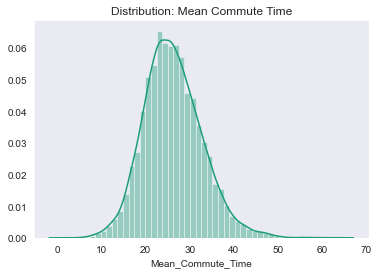

In [1551]:
ax = sns.distplot(final['Mean_Commute_Time'])
ax.set_title("Distribution: Mean Commute Time");

In [1552]:
final['Mean_Commute_Time'].describe()

count    18633.000000
mean        26.208571
std          6.567243
min          1.000000
25%         21.700000
50%         25.700000
75%         30.300000
max         64.200000
Name: Mean_Commute_Time, dtype: float64

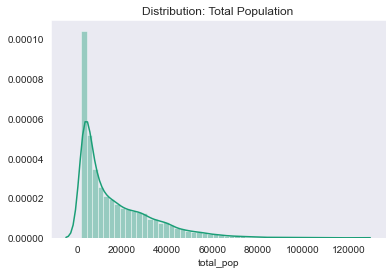

In [1553]:
ax = sns.distplot(final['total_pop'])
ax.set_title("Distribution: Total Population");

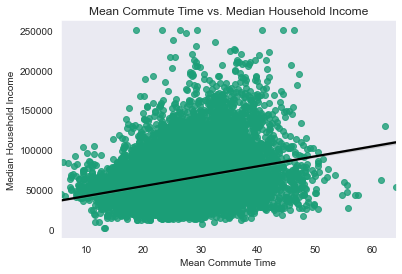

In [1554]:
sns.set_palette("Dark2")
sns.set_style("dark")
ax = sns.regplot(x='Mean_Commute_Time', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("Mean Commute Time vs. Median Household Income")
ax.set_xlabel('Mean Commute Time')
ax.set_ylabel('Median Household Income');

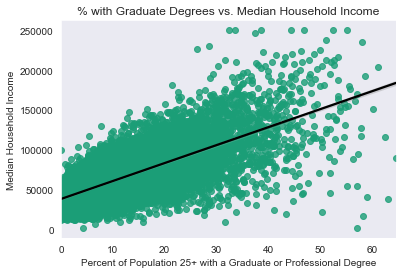

In [1555]:
ax = sns.regplot(x='Estimate!!Percent!!Population 25 years and over!!Graduate or professional degree', 
                 y='Median_HH_Income', data=final, line_kws= {"color": 'black'})
ax.set_title("% with Graduate Degrees vs. Median Household Income")
ax.set_xlabel('Percent of Population 25+ with a Graduate or Professional Degree')
ax.set_ylabel('Median Household Income');

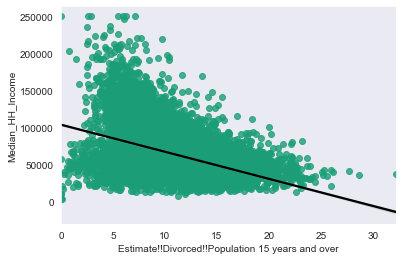

In [1556]:
ax = sns.regplot(x = 'Estimate!!Divorced!!Population 15 years and over', y='Median_HH_Income', data=final, line_kws= {"color": 'black'})


It appears that there is a negative correlation between Divorced Population and median household income

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


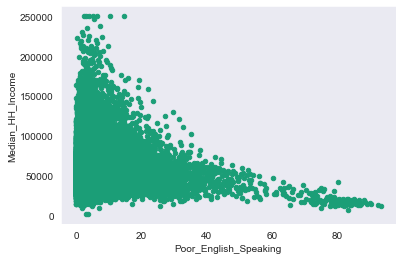

In [1557]:

ax = final.plot.scatter(x='Poor_English_Speaking', y= 'Median_HH_Income')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


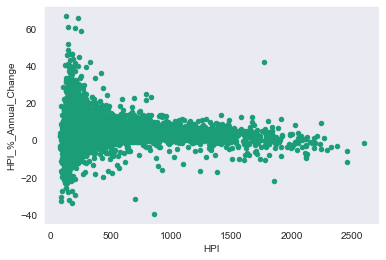

In [1558]:
ax = final.plot.scatter(x='HPI', y= 'HPI_%_Annual_Change')

### Deal with NaNs

Two options 1. Delete rows with missing values, 2. Impute values with missing values

In [1596]:
final_del_nans = final.copy()

In [1597]:
final_del_nans.shape

(18654, 73)

In [1598]:
#HPI_change = final_del_nans['HPI_%_Annual_Change']

In [1599]:
#final_del_nans.drop('HPI_%_Annual_Change', axis=1, inplace=True)

In [1600]:
final_del_nans.dropna(axis=0, how='any', inplace=True)

In [1601]:
final_del_nans.shape

(14633, 73)

In [1783]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_del_nans)

In [1784]:
scaled = pd.DataFrame(scaled, index=final_del_nans.index, columns=final_del_nans.columns)

In [1785]:
#similarity_matrix = linear_kernel(scaled, scaled)

In [1786]:
cosine_matrix = cosine_similarity(scaled, scaled)

In [1787]:
#euclidean_matrix = euclidean_distances(scaled, scaled)

In [1788]:

mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1789]:
# def recommend_zip_based_on_prev_zip(zip_input):
#     zip_index = int(mapping[zip_input])
#     #get similarity values with other zip codes
#     #similarity_score is the list of index and similarity matrix
#     similarity_score = list(enumerate(similarity_matrix[zip_index]))
#     #sort in descending order the similarity score of zip inputted with all the other zip codes
#     similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#     # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
#     similarity_score = similarity_score[0:15]
#     #return zip codes using the mapping series
#     zip_indices = [i[0] for i in similarity_score]
#     best = []
#     for i in zip_indices:
#         best.append(final_del_nans.reset_index().iloc[i][0])
#     print(similarity_score)
#     return best

In [1790]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_del_nans.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged
    #gdf = geopandas.GeoDataFrame(merged, geometry=geopandas.points_from_xy(merged.Longitude, merged.Latitude))


In [1791]:
# def euclidean_recommend_zip(zip_input):
#     zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
#     zip_index = int(mapping[zip_input])
#     #get similarity values with other zip codes
#     #similarity_score is the list of index and similarity matrix
#     similarity_score = list(enumerate(euclidean_matrix[zip_index]))
#     #sort in descending order the similarity score of zip inputted with all the other zip codes
#     similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
#     # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
#     similarity_score = similarity_score[1:20]
#     #return zip codes using the mapping series
#     zip_indices = [i[0] for i in similarity_score]
#     best = []
#     for i in zip_indices:
#         best.append(int(final_del_nans.reset_index().iloc[i][0]))
#     df = pd.DataFrame(data = best, columns = ['Zip'])
#     merged = pd.merge(df,zip_location,on='Zip',how='inner')
#     merged = merged[['Zip', 'City', 'State']]
#     return merged

In [1792]:
cosine_recommend_zip('02130')

,Zip,City,State
0,2140,Cambridge,MA
1,20010,Washington,DC
2,7302,Jersey City,NJ
3,20009,Washington,DC
4,20002,Washington,DC
5,60622,Chicago,IL
6,60640,Chicago,IL
7,60614,Chicago,IL
8,2144,Somerville,MA
9,7086,Union City,NJ


#### Map zip codes to cities

In [1161]:
zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')

#### What happens to the model if we remove features?

#### Remove total population

In [1793]:
final_no_pop = final_del_nans.drop('total_pop', axis=1)

In [1794]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_pop)


In [1795]:
scaled = pd.DataFrame(scaled, index=final_no_pop.index, columns=final_no_pop.columns)

In [1796]:
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1797]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_pop.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1798]:
cosine_recommend_zip('02130')

,Zip,City,State
0,2140,Cambridge,MA
1,20010,Washington,DC
2,7302,Jersey City,NJ
3,20009,Washington,DC
4,20002,Washington,DC
5,60622,Chicago,IL
6,60640,Chicago,IL
7,2144,Somerville,MA
8,7086,Union City,NJ
9,60614,Chicago,IL


There was no change in the top 10 for Needham, MA 02492. For Dallas, 75205, there was no change in the top 4. The order of recommendations changes slightly after that, but the top 10 still consists of the same recommendations. For Woodinville, WA 98072 there was a slight change in order between the last two in the top 10, but otherwise the recommendations stayed the same. By including 40006, a smaller, less affluent town in Kentucky, we see that the impacts are also minimal. 02130 Jamaica Plain Boston just had a slight shift on the lower part of the top 10 recommendations.

### How does HH income impact? Remove median HH income (overall) and median HH income for owners and renters 

In [1799]:
final_no_income = final_del_nans.drop('Median_HH_Income', axis=1)
final_no_income = final_no_income.drop('Median_Owner_HH_Income', axis=1)
final_no_income = final_no_income.drop('Median_Renter_HH_Income', axis=1)

In [1800]:
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_income)
scaled = pd.DataFrame(scaled, index=final_no_income.index, columns=final_no_income.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1801]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_income.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1802]:
cosine_recommend_zip('02130')

,Zip,City,State
0,2140,Cambridge,MA
1,7302,Jersey City,NJ
2,20010,Washington,DC
3,20009,Washington,DC
4,60640,Chicago,IL
5,20002,Washington,DC
6,60622,Chicago,IL
7,60614,Chicago,IL
8,2144,Somerville,MA
9,7086,Union City,NJ


Like total population, removing household income from the recommender had little impact on the recommendations. For Woodinville, 98072, the top 4 remained in the same place. The top 10 had all of the same recommendations except for one; what was number 11 in the original recommender jumped up to the 7th spot after removing income. For 75205 Dallas, 1 & 2 switched places. Most notably, 5 in the original dropped to 12. Looking at 40006, Bedford, KY, we also see minimal impact. 02130 Jamaica Plain Boston just had a slight shift in order.

#### Remove HPI to see impact

In [1803]:
final_no_HPI = final_del_nans.drop('HPI', axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(final_no_HPI)
scaled = pd.DataFrame(scaled, index=final_no_HPI.index, columns=final_no_HPI.columns)
cosine_matrix = cosine_similarity(scaled, scaled)
mapping = pd.Series(scaled.reset_index().index, index = scaled.index)

In [1804]:
def cosine_recommend_zip(zip_input):
    zip_location = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep = ';')
    zip_index = int(mapping[zip_input])
    #get similarity values with other zip codes
    #similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(cosine_matrix[zip_index]))
    #sort in descending order the similarity score of zip inputted with all the other zip codes
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    # Get the scores of the 15 most similar zip codes. Ignore the first zip code.
    similarity_score = similarity_score[1:11]
    #return zip codes using the mapping series
    zip_indices = [i[0] for i in similarity_score]
    best = []
    for i in zip_indices:
        best.append(int(final_no_HPI.reset_index().iloc[i][0]))
    df = pd.DataFrame(data = best, columns = ['Zip'])
    merged = pd.merge(df,zip_location,on='Zip',how='inner')
    merged = merged[['Zip', 'City', 'State']]
    return merged

In [1806]:
print('Recommender without HPI')
cosine_recommend_zip('02130')

Recommender without HPI


,Zip,City,State
0,2140,Cambridge,MA
1,20010,Washington,DC
2,7302,Jersey City,NJ
3,20002,Washington,DC
4,20009,Washington,DC
5,94703,Berkeley,CA
6,60622,Chicago,IL
7,60640,Chicago,IL
8,2144,Somerville,MA
9,60614,Chicago,IL


For 75205 Dallas, a zip code with a very high HPI, the top 4 remained the same. 5 moved down to 6 and was replaced with Little Rock, AR, which previously was not in the top 10 (only in the top 20). This is likely because this area of Little Rock has a much lower HPI. There is nearly no impact on 40006 Bedford KY, a zip code with a low HPI. Needham 02492 had minimal impact as well. 02130 Jamaica Plain Boston had little impact as well, although Berkeley, CA now moved into the top 10 at the expense of Union City, NJ.

In [1781]:
final_del_nans.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 14633 entries, 01001 to 99901
Data columns (total 73 columns):
 #   Column                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                              --------------  -----  
 0   total_pop                                                                                                                                                                           14633 non-null  float64
 1   Percent_Under_5                                                                                                                                                                     14633 non-null  float64
 2   Percent_5_to_9                                     